In [1]:
%matplotlib notebook
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
import pickle

# s0701_16, 304 ns, good current, horizontal

In [127]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday"
rot=90-1.5
s0701_16_532=NeLMap2('s0701_16 532nm side on neL.txt', scale=1982/11.3, rot_angle=rot)
s=s0701_16_532
s.set_origin(origin=[2468,1789], extent=[-7,14,-6,6])

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [128]:
ys=np.arange(-6,14,0.2)
xx=0.4
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


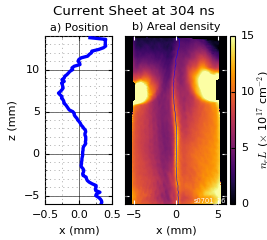

In [134]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,15]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-6,14])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-6, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 304 ns', fontsize=12)


In [135]:
folder=r"~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday"
fn='s0701_16 532nm side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0701_16 End On

In [3]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday"
R0fn="s0701_16_102155_c1.png"
R1fn="s0701_16_102202_c2.png"
B0fn="s0701_16_103044_c1.png"
B1fn="s0701_16_103051_c2.png"
S0fn="s0701_16_112804_c1.png"
S1fn="s0701_16_112811_c2.png"
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-90)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday\s0701_16 Faraday


In [4]:
t=pickle.load(open("s0701_16 faraday registration.p", "rb"))
s.register(transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [5]:
s.scale=59
extent=[-13,13,-9,9]
s.set_origin((1853,1287), extent=extent)

In [6]:
%cd "~\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday"
I0fn="s0701_16 IR end on interferometry (2).JPG"
nefn="s0701_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0701_16 Horizontal Double Exploder Faraday


C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [7]:
t=pickle.load(open("s0701_16 interferometry transform.p", "rb"))
b.register(transform=t)

In [8]:
b.scale=s.scale
b.set_origin(s.origin, extent=extent)
#b.plot_data_mm(clim=[-3,3])

In [9]:
b_map=b.data_c.copy()
b_map[b_map>100]=0
b_map[b_map<-100]=0

In [10]:
s0701_16_ne=NeLMap2('s0701_16 IR neL.txt', scale=s.scale) 
ne=s0701_16_ne
ne.data=b.I1T
ne.scale=s.scale

In [11]:
ne.set_origin(origin=s.origin, extent=extent)

<IPython.core.display.Javascript object>


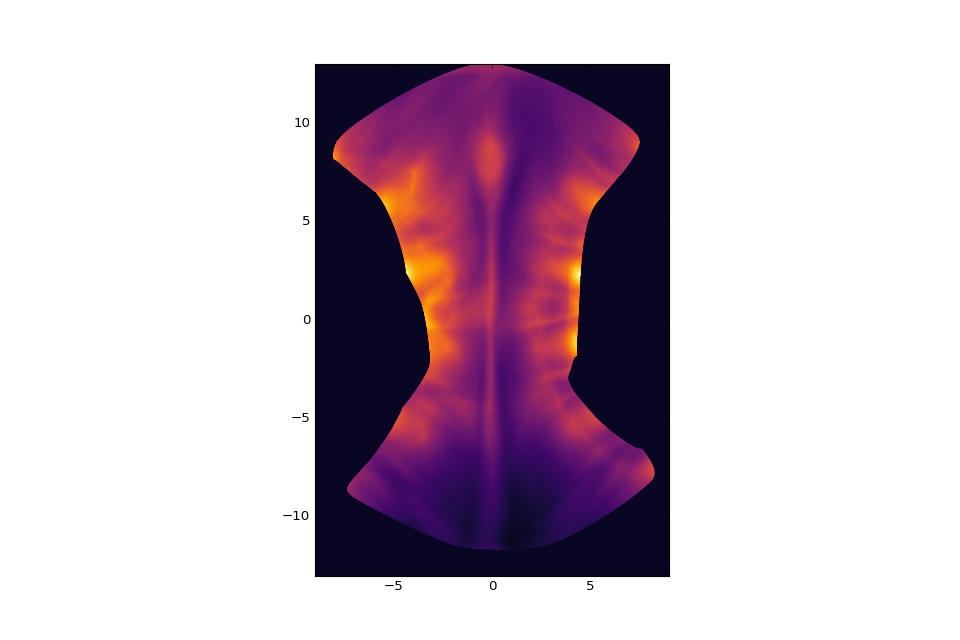

In [173]:
ne.plot_data_mm()

In [68]:
eo=ne
so=s0701_16_532

In [69]:
xx=3
start=(0,-xx)
end=(0,xx)

eo.create_lineout(start=start, end=end, lineout_width=eo.data_c.shape[0])
so.create_lineout(start=end, end=start, lineout_width=so.data_c.shape[0])

(767, 354) (767, 708)
(1052, 1578) (1052, 526)


<IPython.core.display.Javascript object>


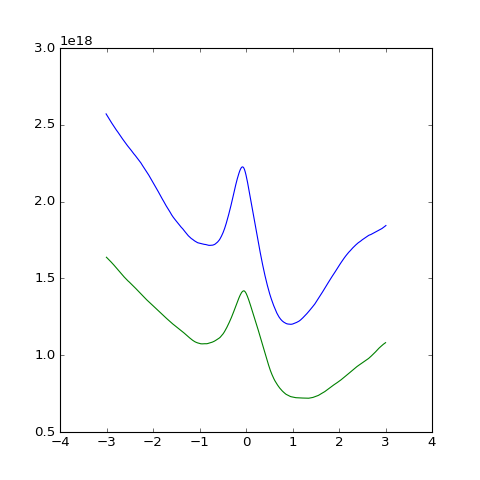

In [70]:
Y=eo.data_c.shape[0]/(eo.scale*10)
Z=so.data_c.shape[0]/(so.scale*10)

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(eo.mm,eo.lo*Y)
ax.plot(so.mm,so.lo*Z)

In [61]:
Z

2.0000201816347127

In [72]:
eo.create_lineout(start=end, end=start, lineout_width=eo.scale*10)

(767, 708) (767, 354)


In [73]:
eo_lo_on_so_scale=np.interp(so.mm, eo.mm, eo.lo)

<IPython.core.display.Javascript object>


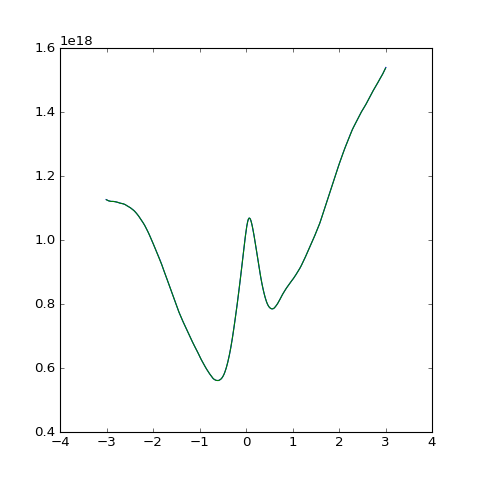

In [74]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(eo.mm,eo.lo)
ax.plot(so.mm,eo_lo_on_so_scale)

In [75]:
so.set_origin(origin=[2468,1789], extent=[-6,6,-3,3])
ideal_so=np.array([eo_lo_on_so_scale for i in range(so.data_c.shape[0])])

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [76]:
diff=so.data_c-ideal_so

<IPython.core.display.Javascript object>


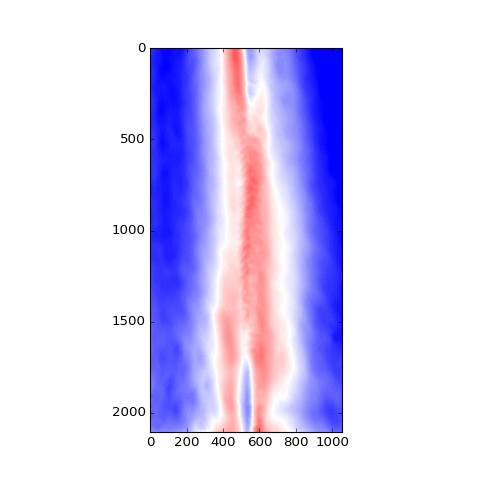

In [77]:
fig,ax=plt.subplots(figsize=(6,6))
ax.imshow(diff/1e18, clim=[-0.5,0.5], cmap='bwr')

<IPython.core.display.Javascript object>


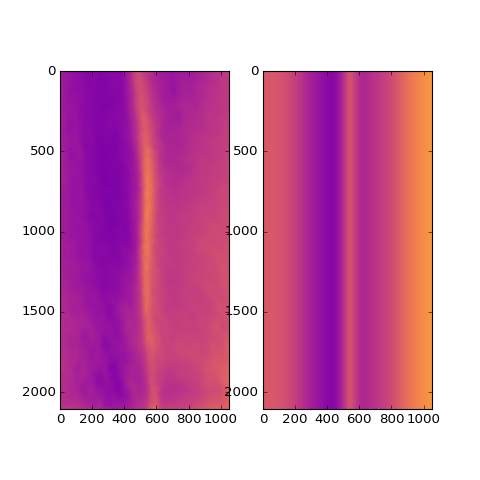

In [78]:
fig,ax=plt.subplots(1,2, figsize=(6,6))
ax[0].imshow(so.data_c/1e18, clim=[0,2], cmap=cmaps.plasma)
ax[1].imshow(ideal_so/1e18, clim=[0,2], cmap=cmaps.plasma)

In [84]:
d_lo=profile_line(diff, src=(1000,0),dst=(1000,1000), linewidth=30)

<IPython.core.display.Javascript object>


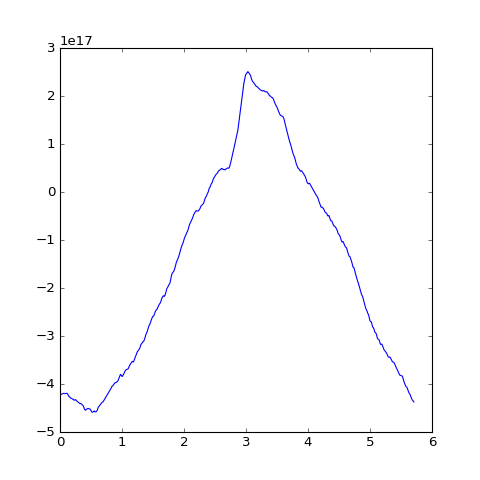

In [93]:
fig,ax=plt.subplots(figsize=(6,6))
xxx=np.linspace(0,d_lo.size/so.scale, d_lo.size)
ax.plot(xxx,d_lo)

In [92]:
np.linspace(0,d_lo.size/so.scale, d_lo.size)

array([ 0.        ,  0.00570701,  0.01141403, ...,  5.69559909,
        5.7013061 ,  5.70701312])

# s0612_15, 191 ns, excellent current

In [187]:
%cd "~\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS"
rot=180+1.6
s0612_15_IR=NeLMap2('s0612_15 IR side on neL.txt', scale=100.5, rot_angle=rot)
s=s0612_15_IR
s.set_origin(origin=[1716,2284], extent=[-15,15,-6,6])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [188]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


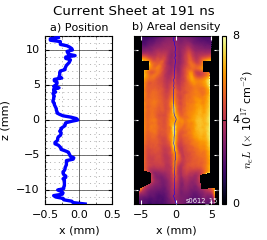

In [194]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,8]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,4,8])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 191 ns', fontsize=12)


In [195]:
folder=r"~\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS"
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0512_15, 215 ns, good current

In [81]:
%cd "~\Google Drive\MAGPIE\data\2015\s0512_15 RECONNECTION - Carbon
rot=180+3
s0512_15_IR=NeLMap2('s0512_15 IR side on neL.txt', scale=100.5, rot_angle=rot)
s=s0512_15_IR
s.set_origin(origin=[1552,2387], extent=[-12,12,-6,6])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0512_15 RECONNECTION - Carbon


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [90]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


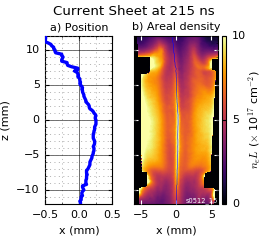

In [114]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,10]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 215 ns', fontsize=12)


In [115]:
folder=r"~\Google Drive\MAGPIE\data\2015\s0512_15 RECONNECTION - Carbon"
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0405_16, 257 ns excellent current

In [150]:
%cd "~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY"
rot=180+2.2
s0405_16_IR=NeLMap2('s0405_16 side on neL.txt', scale=100.5, rot_angle=rot)
s=s0405_16_IR
s.set_origin(origin=[1491,2400], extent=[-14,14,-6,6])

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [145]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


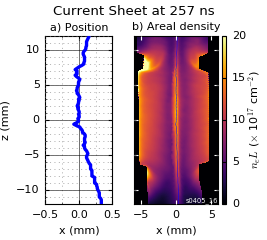

In [148]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,20]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15,20])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 257 ns', fontsize=12)


In [149]:
folder=r"~\Google Drive\MAGPIE\data\2016\s0405_16 C RECONNECTION FARADAY"
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0825_16, 301 ns, excellent current

In [160]:
folder=r"~\Google Drive\MAGPIE\data\2016\s0825_16 Reconnection C TS"
os.chdir(os.path.expanduser(folder))
rot=180+0.4
s0825_16_IR=NeLMap2('s0825_16 IR neL.txt', scale=100.5, rot_angle=rot)
s=s0825_16_IR
s.set_origin(origin=[1763,2630], extent=[-14,14,-6,6])

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [166]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


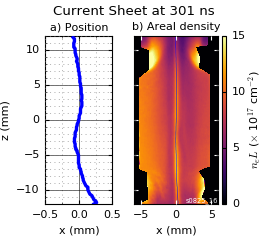

In [167]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,15]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15,20])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 301 ns', fontsize=12)


In [168]:
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0513_15, 251 ns, excellent current

In [171]:
folder=r"~\Google Drive\MAGPIE\data\2015\s0513_15 RECONNECTION - Carbon repeat"
os.chdir(os.path.expanduser(folder))
rot=180+0.75
s0513_15_IR=NeLMap2('s0513_15 neL side on.txt', scale=100.5, rot_angle=rot)
s=s0513_15_IR
s.set_origin(origin=[1618,2482], extent=[-14,14,-6,6])

In [173]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


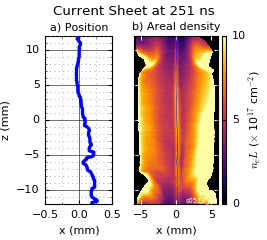

In [176]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,10]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15,20])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 251 ns', fontsize=12)


In [177]:
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

# s0616_15, 259 ns, excellent current

In [178]:
folder=r"~\Google Drive\MAGPIE\data\2015\s0616_15 RECONNECTION C No TS"
os.chdir(os.path.expanduser(folder))
rot=3.45
s0616_15_IR=NeLMap2('s0616_15 IR side on neL.txt', scale=100.5, rot_angle=rot)
s=s0616_15_IR
s.set_origin(origin=[1801,2330], extent=[-14,14,-6,6])

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


In [182]:
ys=np.arange(-12,12,0.2)
xx=0.5
centres=np.zeros_like(ys, dtype=np.float)

for i, yy in enumerate(ys):
    s.create_lineout(start=(yy,-xx),end=(yy,xx), lineout_width=50)
    c=s.mm[np.argmax(s.lo)]
    centres[i]=c

<IPython.core.display.Javascript object>


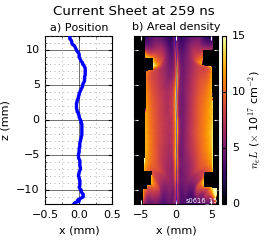

In [185]:
fig=plt.figure(figsize=(3.34,3))

b=0.15
h=0.7

ax1=fig.add_axes([0.17, b, 0.25, h])#l,b,w,h
ax2=fig.add_axes([0.35, b, 0.65, h], sharey=ax1)#l,b,w,h


a=ax2
clim=[0,15]

ne_im=s.plot_data_mm(clim=clim, multiply_by=1e-17, ax=a)
a.set_xlabel('x (mm)',fontsize=10)
a.set_xticks([-5,0,5])

#a.set_yticks([])
a.set_ylim([-12,12])
a.tick_params(labelsize=10, pad=5, length=5, width=1)
a.text(s=s.fn, x=6, y=-12, fontsize=6, ha='right', va='bottom', color='white')
a.set_yticks([-5,0,5,10])
a.plot(centres,ys, zorder=5, lw=0.5)
a.tick_params(labelsize=10, pad=5, length=4, width=1, labelleft=False, color='w')

divider = make_axes_locatable(a)
cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ne_im, cax=cbar_ax, ticks=[0,5,10,15,20])
cbar_ax.set_ylabel(r'$n_e L$ ($\times$ 10$^{17}$ cm$^{-2}$)',fontsize=10, labelpad=0)
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
        
a.set_title('b) Areal density', fontsize=10)
a=ax1
a.plot(centres,ys, zorder=5, lw=3)
a.set_xlim([-0.5,0.5])
a.set_xlabel('x (mm)',fontsize=10)
a.set_ylabel('z (mm)',fontsize=10)
a.tick_params(labelsize=10, pad=5, length=4, width=1)

a.xaxis.set_minor_locator(MultipleLocator(0.25))
a.xaxis.set_major_locator(MultipleLocator(0.2))
a.yaxis.set_minor_locator(MultipleLocator(1))
a.yaxis.set_major_locator(MultipleLocator(5))

a.grid(which='minor', color='gray',linestyle=':')
a.grid(which='major', color='black',linestyle='-')
cbar_ax.tick_params(labelsize=10, pad=5, length=4, width=1)
a.set_title('a) Position', fontsize=10)


a.set_xticks([-0.5,0,0.5])

fig.suptitle('Current Sheet at 259 ns', fontsize=12)


In [186]:
fn=s.fn+' side on ne map.png'
p=os.path.expanduser(os.path.join(folder,fn))
fig.savefig(p, dpi=400, facecolor='w')

<IPython.core.display.Javascript object>


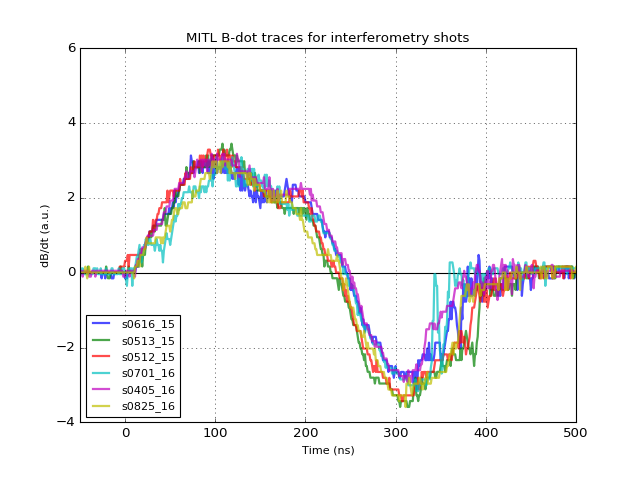

s0616_15
s0513_15
s0512_15
s0701_16
s0405_16
s0825_16


In [234]:
from bdots import MitlBdots

shots=['s0513_15', 's0512_15', 's0616_15', 's0825_16', 's0405_16', 's0701_16']
m={}
i=2
for s in shots:
    m[s]=MitlBdots(s)
for bd in m['s0512_15'].mbds:
    bd.time=m['s0513_15'].mbds[0].time
m['s0512_15'].mbds[0].data=m['s0512_15'].mbds[1].data

fig,ax=plt.subplots()
    
ax.plot([-100,500], [0,0], c='k')
for mm in m:
    d=m[mm]
    print(mm)
    d.truncate(threshold=0.95)
    ax.plot(d.mbds[i].time_tr0-27, -d.mbds[i].data_tr, label=mm, lw=2, alpha=0.7)
    
'''for tt,n in zip(t, names):
    ax.arrow(tt, 2, 0,-1.5, head_width=10, head_length=0.5, fc='k', ec='k',lw=2,zorder=10)
    ax.text(x=tt-5, y=2.1, s=str(n),rotation=75, va='bottom', ha='left', fontsize=10)'''
    
ax.set_xlim([-50,500])
ax.set_ylim([-4,6])
ax.legend(fontsize=10, loc=3)

ax.set_xlabel('Time (ns)', fontsize=10)
ax.set_ylabel('dB/dt (a.u.)', fontsize=10)
ax.set_title('MITL B-dot traces for interferometry shots', fontsize=12)
ax.grid(True)

plt.subplots_adjust(bottom=0.12)


<IPython.core.display.Javascript object>


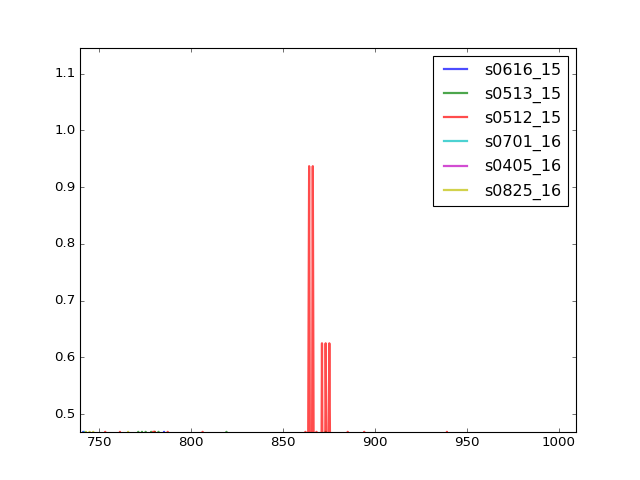

In [233]:
shots=['s0513_15', 's0512_15', 's0616_15', 's0825_16', 's0405_16', 's0701_16']
m={}
mbd=2

fig,ax=plt.subplots()

for s in shots:
    m[s]=MitlBdots(s)
    
for bd in m['s0512_15'].mbds:
    bd.time=m['s0513_15'].mbds[0].time
    
ax.plot([-100,500], [0,0], c='k')
for mm in m:
    d=m[mm]
    ax.plot(d.mbds[mbd].time, -d.mbds[mbd].data, label=mm, lw=2, alpha=0.7)
ax.legend()

<IPython.core.display.Javascript object>


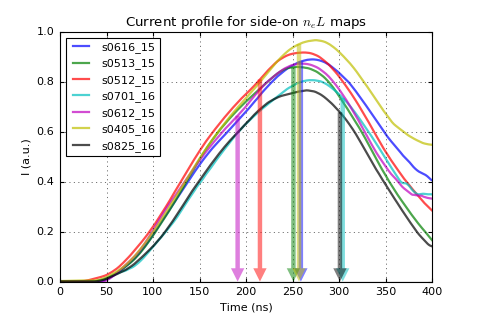

In [300]:
from bdots import MitlBdots


shots=['s0513_15', 's0512_15', 's0616_15', 's0825_16', 's0405_16', 's0701_16', 's0612_15']
t={'s0513_15':251, 's0512_15':215, 's0616_15':259, 's0825_16':301, 's0405_16':257, 's0701_16':304, 's0612_15':191}
m={}
i=2
for s in shots:
    m[s]=MitlBdots(s)
for bd in m['s0512_15'].mbds:
    bd.time=m['s0513_15'].mbds[0].time
m['s0512_15'].mbds[0].data=m['s0512_15'].mbds[1].data

fig,ax=plt.subplots(figsize=(6,4))
    
ax.plot([-100,500], [0,0], c='k')
for mm in m:
    d=m[mm]
    d.truncate(threshold=0.95)
    d.integrate()
    line=ax.plot(d.mbds[i].time_B0, -d.mbds[i].B/500, label=mm, lw=2, alpha=0.7)
    index=np.argmin(np.abs(d.mbds[i].time_B0-t[mm]))
    B_where=-d.mbds[i].B[index]/500
    ax.annotate(s='',xy=(t[mm], 0), xytext=(t[mm],B_where),
                arrowprops=dict(facecolor=line[0].get_color(), 
                                ec='none',
                               alpha=0.5)
               )
'''for tt,n in zip(t, names):
    ax.arrow(tt, 2, 0,-1.5, head_width=10, head_length=0.5, fc='k', ec='k',lw=2,zorder=10)
    ax.text(x=tt-5, y=2.1, s=str(n),rotation=75, va='bottom', ha='left', fontsize=10)'''
    
ax.set_xlim([0,400])
ax.set_ylim([0,1])
ax.legend(fontsize=10, loc=2)
ax.tick_params(labelsize=10, pad=5, length=4, width=1)

ax.set_xlabel('Time (ns)', fontsize=10)
ax.set_ylabel('I (a.u.)', fontsize=10)
ax.set_title(r'Current profile for side-on $n_eL$ maps', fontsize=12)
ax.grid(True)

plt.subplots_adjust(bottom=0.12)

In [301]:
fol="~\Google Drive\MAGPIE\conferences\plaspar2017"
fn='Side on current profiles.png'
p=os.path.expanduser(os.path.join(fol,fn))
fig.savefig(p, dpi=400, facecolor='w')

In [262]:
import matplotlib
a=matplotlib.rcParams['axes.prop_cycle']

In [287]:
ax._get_lines.color_cycle

AttributeError: '_process_plot_var_args' object has no attribute 'color_cycle'

In [292]:
line[0].get_colour()

AttributeError: 'Line2D' object has no attribute 'get_colour'